### CI Project notebook for demostration

#### Gautam Borgohain

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.notebook_repr_html = True
pd.options.display.max_columns = None

In [2]:
data_unlab = pd.read_excel('/Users/gautamborgohain/Desktop/DATA/Tweets_unlabeled.xlsx')
data_unlab.head()

,Created At,DayWeek,DayYear,Hour,ID,In Reply To,Language,Place,ReTweet Count,Sentiment_SVM,Tweet,User Handle
1,2016-02-11 07:28:59,3,42,7,697562938056514944,NaN,en,"West Region, Singapore",0,1,I'm at Jurong East MRT Interchange (NS1/EW24) ...,_nrsaa
2,2016-02-11 07:27:29,3,42,7,697562561647136000,NaN,en,"Central Region, Singapore",0,1,I'm at Bishan MRT Interchange (NS17/CC15) - @s...,syfqhntsh
3,2016-02-11 07:22:47,3,42,7,697561378115207040,NaN,en,"West Region, Singapore",0,1,I'm at Lakeside MRT Station (EW26) - @smrt_sin...,Jeffvynxn
4,2016-02-11 07:17:08,3,42,7,697559957986791040,NaN,en,"West Region, Singapore",0,1,I'm at Pioneer MRT Station (EW28) - @smrt_sing...,Jeffvynxn
5,2016-02-11 07:15:19,3,42,7,697559501227080960,NaN,en,"North Region, Singapore",0,1,I'm at Yew Tee MRT Station (NS5) - @smrt_singa...,FattyAhQi


### Clean the tweets

Replace some of the emoticons, urls and @ symbols with more processable words

In [3]:
import re
def regexStuff(tweet):
    tweet = re.sub(r'@[^ ]*','TARGET',tweet)
#     tweet = re.sub('((www\.[^ ]+)|(https?://[^ ]+))', '_URL_', tweet)
#     tweet = re.sub(r'@[^ ]*','',tweet)
    tweet = re.sub('((www\.[^ ]+)|(https?://[^ ]+))', '', tweet)
    tweet = re.sub(r'[\n]','',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\.]+', '.', tweet)
    tweet = re.sub(r':-D|:D',' HAPPY',tweet)
    tweet = re.sub(r':-\)|:\)',' HAPPY',tweet)
    tweet = re.sub(r':-\(|:\(',' SAD',tweet)
    tweet = re.sub(r';-\)|;\)',' WINK',tweet)
    tweet = re.sub(r'#','HASH_',tweet)
    return tweet



In [4]:
cleanedtweets = [regexStuff(tweet) for tweet in data_unlab['Tweet']]
cleanedtweets[:20]

["I'm at Jurong East MRT Interchange (NS1/EW24) - TARGET in Singapore ",
 "I'm at Bishan MRT Interchange (NS17/CC15) - TARGET in Singapore ",
 "I'm at Lakeside MRT Station (EW26) - TARGET in Singapore ",
 "I'm at Pioneer MRT Station (EW28) - TARGET in Singapore ",
 "I'm at Yew Tee MRT Station (NS5) - TARGET in Singapore ",
 "I'm at SMRT Buses: Bus 188 in Singapore ",
 "I'm at Jurong East MRT Interchange (NS1/EW24) - TARGET in Singapore ",
 "I'm at Jurong East MRT Interchange (NS1/EW24) - TARGET in Singapore ",
 "I'm at Yew Tee MRT Station (NS5) - TARGET in Singapore ",
 "I'm at SMRT Buses: Bus 176 in Singapore ",
 "I'm at Braddell MRT Station (NS18) - TARGET in Singapore ",
 "I'm at Outram Park MRT Interchange (EW16/NE3) - TARGET in Singapore ",
 "I'm at Aljunied MRT Station (EW9) - TARGET in Singapore ",
 'Inside bus 900A. (TARGET SMRT Buses: Bus 900A in Singapore) ',
 "I'm at Bishan MRT Interchange (NS17/CC15) - TARGET in Singapore ",
 "I'm at Eunos MRT Station (EW7) - TARGET in Sing

In [5]:
data_unlab_copy = data_unlab.copy()
data_unlab_copy['Tweet'] = cleanedtweets

### Remove the tweets which are automatically generated by the Swarm app

They start with 'I'm at' or have it in content along with an mrt station name

In [6]:
def swarmTweet(tweet):
    tweet = tweet.lower()
    if re.search(r'i\'m at [a-z ]* mrt ', tweet) or tweet.startswith('i\'m at'):
        return True
    else:
        return False
    
data_unlab_copy['isSwarm'] = [swarmTweet(tweet) for tweet in data_unlab_copy['Tweet']]
data_unlab_copy = data_unlab_copy[data_unlab_copy.isSwarm == False]
print(len(data_unlab_copy))

1634


### Initialize the CountVectorizer 

For generating the documentmatrix representation of the tokens in the tweets

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1,max_df=1.0,stop_words='english',lowercase=True,ngram_range=(1,2))

### Plot the most frequent words in the dataset

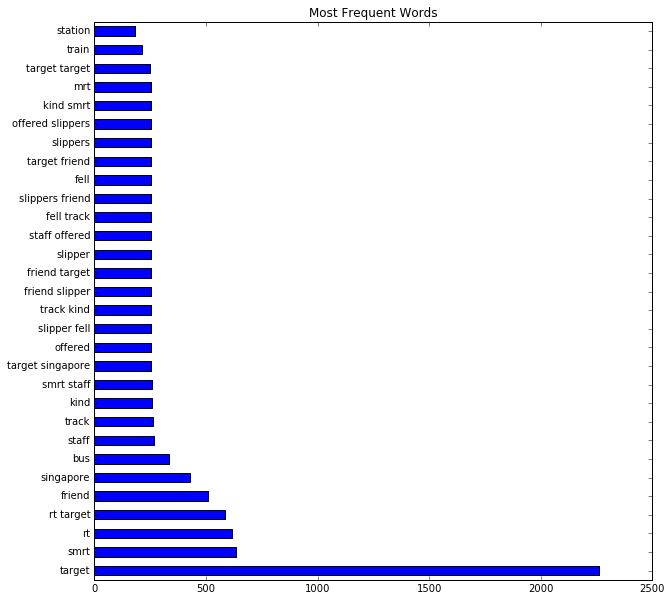

In [8]:
documentmatrix = vectorizer.fit_transform(data_unlab_copy['Tweet']).toarray()
columns = vectorizer.get_feature_names()
vectordf = pd.DataFrame(data=documentmatrix, columns=columns)
words = vectordf.sum(axis = 0)
words.sort_values(ascending=False)[:30].plot(kind = 'barh',title = 'Most Frequent Words',figsize = (10,10))

### Stanford Core NLP dependency tree features

cd stanford-corenlp-full-2015-12-09/

export CLASSPATH="`find . -name '*.jar'`" 

java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer

In [12]:
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

In [16]:
text = ("U guys better wake up ur idea! People pay so much for ur crappy service. People late for work now. ATSMRT")
output = nlp.annotate(text, properties={
        'annotators': 'parse,relation',
        'outputFormat': 'json'
    })
print(output)
# print(output['sentences'][0]['basic-dependencies'])

{'sentences': [{'collapsed-ccprocessed-dependencies': [{'governorGloss': 'ROOT', 'dependentGloss': 'guys', 'dependent': 2, 'governor': 0, 'dep': 'ROOT'}, {'governorGloss': 'guys', 'dependentGloss': 'U', 'dependent': 1, 'governor': 2, 'dep': 'compound'}, {'governorGloss': 'wake', 'dependentGloss': 'better', 'dependent': 3, 'governor': 4, 'dep': 'amod'}, {'governorGloss': 'guys', 'dependentGloss': 'wake', 'dependent': 4, 'governor': 2, 'dep': 'dep'}, {'governorGloss': 'idea', 'dependentGloss': 'up', 'dependent': 5, 'governor': 7, 'dep': 'case'}, {'governorGloss': 'idea', 'dependentGloss': 'ur', 'dependent': 6, 'governor': 7, 'dep': 'compound'}, {'governorGloss': 'wake', 'dependentGloss': 'idea', 'dependent': 7, 'governor': 4, 'dep': 'nmod:up'}, {'governorGloss': 'guys', 'dependentGloss': '!', 'dependent': 8, 'governor': 2, 'dep': 'punct'}], 'parse': '(ROOT\n  (NP\n    (NP (NNP U) (NNS guys))\n    (NP\n      (NP (JJR better) (NN wake))\n      (PP (IN up)\n        (NP (NN ur) (NN idea))))\

## Generate target dependent features


"wi is a transitive verb and T (or any of the extended target) is its object; we generate a feature wi _arg2. "
"wi is a transitive verb and T (or any of the extended target) is its subject; we generate a feature wi_arg1 "
"wi is a intransitive verb and T (or any of the extended target) is its subject; we generate a feature wi_it_arg1"

Commented out the lines for checking target as the dependent 


In [62]:
data_unlab_copy['Tweet'][9:10] = "iPhone works better with the Cell- Band"
data_unlab_copy['Tweet'][10]

'iPhone works better with the Cell- Band'

In [63]:
targets = ['SMRT','smrt','smrt_singapore','SMRT_SINGAPORE','train','mrt','TARGET','people','iPhone']

for tweet in data_unlab_copy['Tweet'][5:11]:
    output = nlp.annotate(tweet, properties={
        'annotators': 'parse,relation',
        'outputFormat': 'json'
    })
    for i in range(len(output['sentences'])):
        features = []
        posdicts = output['sentences'][i]['tokens']
        depdicts = output['sentences'][i]['basic-dependencies']
        for posdict in posdicts:
            for k in posdict:# Iterate through the POS tag dict and search for a verb 
                if(k == 'pos' and posdict[k] in ['VBG','VB','VBD','VBN','VBP','VBZ']):
                    verb = posdict['word'] #If found a verb then get the word 
                    for depdict in depdicts:
                        if depdict['governorGloss'] == verb: #Iterate through the depdict and look for dependent
        #                     if depdict['dependentGloss'] in targets:# If the verb is targeting the list of targets specified
                                if depdict['dep'] in ['obj','pobj','dobj','iobj','nmod']: #If the dependecy type is that of an object
                                    features.append(verb+'_OBJ')
                                elif depdict['dep'] in ['nsubj','dep']:# If dependency relation is a subject
                                    features.append(verb+'_SUBJ')
                        elif depdict['dependentGloss'] == verb: #Iterate through the depdict and look for governer
        #                     if depdict['governorGloss'] in targets:# If the verb is targeting the list of targets specified
                                if depdict['dep'] in ['obj','pobj','dobj','iobj','nmod']: #If the dependecy type is that of an object
                                    features.append('OBJ_'+verb)
                                elif depdict['dep'] in ['nsubj','dep']:# If dependency relation is a subject
                                    features.append('SUBJ_'+verb)
                            
                if(k == 'pos' and posdict[k] in ['JJ','JJR','JJS','NN','NNS','NNP','NNPS']):
                    adjn = posdict['word'] #If found a adjective or noun then get the word 
                    for depdict in depdicts:
                        if depdict['governorGloss'] in targets and depdict['dependentGloss'] == adjn: #Iterate through the depdict and look for dependent
                                    features.append(adjn+'_SUBJ')
                if(k == 'pos' and posdict[k] in ['RB','RBR','RBS']):
                    adverb = posdict['word']
                    for depdict in depdicts:
                        if(depdict['dependentGloss'] == adverb):
                            verb = depdict['governorGloss']
                            for depdict in depdicts:
                                if((depdict['governorGloss'] == verb or depdict['dependentGloss'] == verb) and (depdict['governorGloss'] in targets or depdict['dependentGloss'] in targets)):
                                    features.append('SUBJ_v_'+adverb)
                                    
                                
                              
    print(tweet)
    print(features)
#     print(output)


To those mother fuckers so call good singapore citizen or so called the good guys and to the fucking SMRT MRTI. 
['fuckers_OBJ', 'fuckers_OBJ', 'fuckers_SUBJ', 'called_OBJ']
Report SMRT defects via WhatsApp - DKSG HASH_whatsapp 
['Report_SUBJ', 'defects_SUBJ', 'defects_OBJ']
finally ended (TARGET Bayfront MRT Interchange (CE1/DT16) - TARGET in Singapore) 
['ended_SUBJ', 'Singapore_SUBJ']
TARGET TARGET TARGET report to the mrt whatsapp. Chairs stolen
['stolen_SUBJ']
iPhone works better with the Cell- Band
['works_SUBJ', 'works_OBJ', 'SUBJ_v_better']
RT TARGET If there are seats here we will all be seating. I dont understand why u do this TARGET 
['dont_SUBJ', 'do_SUBJ', 'do_OBJ']


# To do :  Subjectivity and Hashtags